# Some examples looking at day-to-day variability

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xarray as xr
import math as math
from scipy.optimize import curve_fit
import seaborn as sns
plt.style.use('seaborn')

## U AND V DATA

In [9]:
dsm = xr.open_dataset('/home/bharding/public_html/GIGI_Deng/eqcross_mv05iv06_r00_mti_2021.nc')
dsi = xr.open_dataset('/home/bharding/public_html/GIGI_Deng/eqcross_mv05iv06_r00_ivm_2021.nc')

dsi = dsi.load() # For some reason I don't understand, this is sometimes necessary

### Use IVM file for spatial/temporal calculations

Note: this takes a couple minutes to run. It could probably be made more efficient

In [19]:
# This will save all of the changes between the pairs.

delta_t_hr = [] 
delta_lat = [] 
delta_lon = [] 
delta_slt = [] 

dsi0 = dsi.sel(dt=0) # Only need to consider central timestamp for each crossing (dt=0)

for i in range(len(dsi.num)):
    # Status indicator
    if np.mod(i,500) == 0:
        print('%i / %i' % (i, len(dsi.num)))
    
    ds1 = dsi0.isel(num=i)
    
    # Grab all other timestamps that are 0-36 hours in the future, collect them in dataset ds2, which is a subset of the full dataset
    delta_t = dsi0.time - ds1.time 
    happens_soon_after = (delta_t > pd.to_timedelta('0h')) & (delta_t < pd.to_timedelta('36h'))
    ds2 = dsi0.where(happens_soon_after, drop=True)
        
    # Record some parameters of interest. This would be cleaner using xarray but just for simplicity, this uses numpy arrays
    delta_t_hr.extend(pd.to_timedelta(ds2.time - ds1.time).total_seconds()/3600.)
    delta_lat.extend(ds2.lat - ds1.lat)
    delta_lon.extend(np.mod(ds2.lon - ds1.lon + 180, 360) - 180) # Note handling of 0-360 longitudes (makes sense to do delta_lon in -180 to +180)
    delta_slt.extend(np.mod(ds2.slt - ds1.slt + 12, 24) - 12) # Similar for local times (-12 to +12)
    
delta_t_hr = np.array(delta_t_hr)
delta_lat = np.array(delta_lat)
delta_lon = np.array(delta_lon)
delta_slt = np.array(delta_slt)



0 / 7594
500 / 7594
1000 / 7594
1500 / 7594
2000 / 7594
2500 / 7594
3000 / 7594
3500 / 7594
4000 / 7594
4500 / 7594
5000 / 7594
5500 / 7594
6000 / 7594
6500 / 7594
7000 / 7594
7500 / 7594


<IPython.core.display.Javascript object>


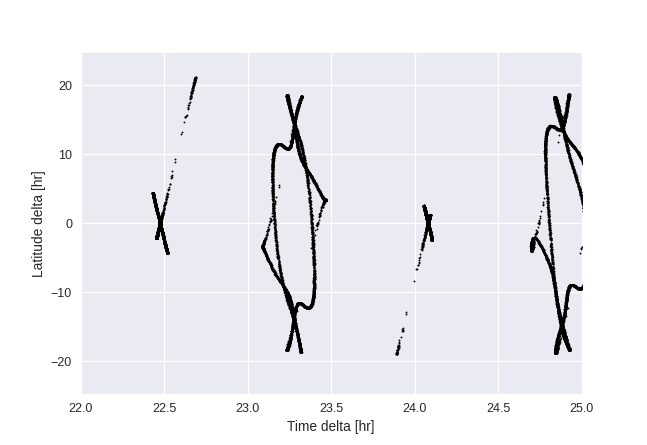

(22.0, 25.0)

In [20]:
plt.figure()
plt.plot(delta_t_hr, delta_lat, 'k.', ms=3)
plt.xlabel('Time delta [hr]')
plt.ylabel('Latitude delta [hr]')
plt.xlim(22,25)

<IPython.core.display.Javascript object>


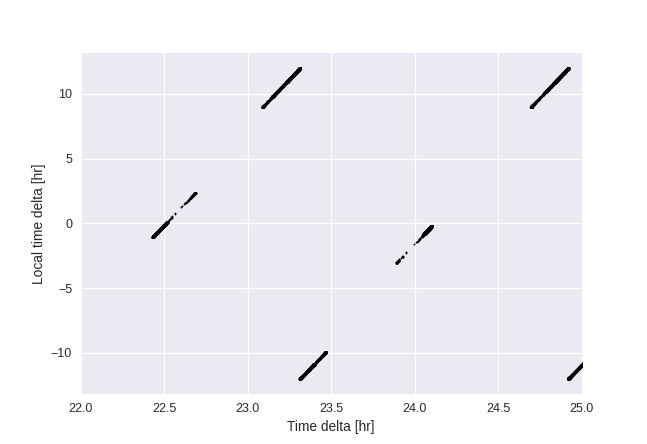

(22.0, 25.0)

In [21]:
plt.figure()
plt.plot(delta_t_hr, delta_slt, 'k.', ms=3)
plt.xlabel('Time delta [hr]')
plt.ylabel('Local time delta [hr]')
plt.xlim(22,25)

<IPython.core.display.Javascript object>


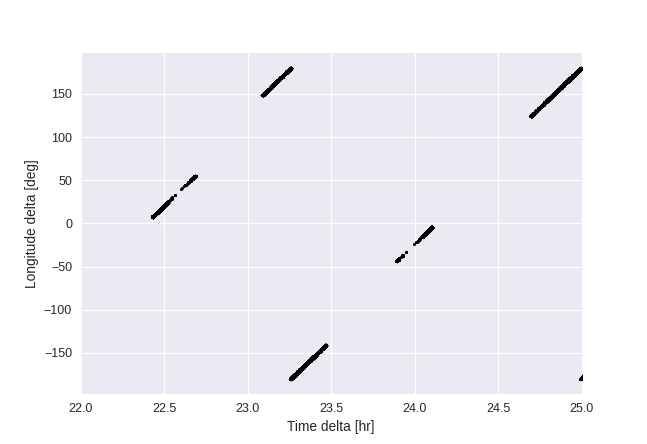

(22.0, 25.0)

In [22]:
plt.figure()
plt.plot(delta_t_hr, delta_lon, 'k.', ms=5)
plt.xlabel('Time delta [hr]')
plt.ylabel('Longitude delta [deg]')
plt.xlim(22,25)

# The "pairs" of most interest are the nearly 24-hour deltas, which arrive back at nearly the same location (lat/lon) and are at nearly the same LT

There look to be some minor outliers at around 23.8 hours which sample kind of far from the same place (delta lon about -40 deg) so we'll ignroe those

## Target: Δt = 24.0 - 24.15 hours

In [23]:
n0 = sum((delta_t_hr > 24.) & (delta_t_hr < 24.15))
print('Total number of 24-hour pairs: %i' % n0)

Total number of 24-hour pairs: 6763
